<a href="https://colab.research.google.com/github/ewankim1023/Projects/blob/master/Yolov3_train_TUV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Yolo v3 Download and Install

In [1]:
!git clone https://github.com/ultralytics/yolov3
!cd yolov3;pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 9957, done.
remote: Total 9957 (delta 0), reused 0 (delta 0), pack-reused 9957
Receiving objects: 100% (9957/9957), 9.31 MiB | 21.19 MiB/s, done.
Resolving deltas: 100% (6716/6716), done.
     |████████████████████████████████| 596 kB 4.0 MB/s 
     |████████████████████████████████| 1.7 MB 14.6 MB/s 
     |████████████████████████████████| 180 kB 39.8 MB/s 
     |████████████████████████████████| 140 kB 39.4 MB/s 
     |████████████████████████████████| 97 kB 5.7 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 


In [2]:
# Download yoloss22
!wget -O tuvulogo.zip https://github.com/ewankim1023/SDLCV/blob/master/tuvulogo.zip?raw=true
# Make a directory - under Content
!mkdir /content/yolotuv
# Unzip the yoloss22
!unzip tuvulogo.zip -d /content/yolotuv

--2021-12-19 22:38:07--  https://github.com/ewankim1023/SDLCV/blob/master/tuvulogo.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ewankim1023/SDLCV/raw/master/tuvulogo.zip [following]
--2021-12-19 22:38:07--  https://github.com/ewankim1023/SDLCV/raw/master/tuvulogo.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ewankim1023/SDLCV/master/tuvulogo.zip [following]
--2021-12-19 22:38:07--  https://raw.githubusercontent.com/ewankim1023/SDLCV/master/tuvulogo.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

In [ ]:
# Weights and Bias
# !pip install wandb

### Dataset용 yaml 파일을 생성하고 학습 수행


In [3]:
!wget -O /content/yolotuv/yolotuv.yaml https://raw.githubusercontent.com/Koreanscot/Projects/master/yolotuv.yml

--2021-12-19 22:38:08--  https://raw.githubusercontent.com/Koreanscot/Projects/master/yolotuv.yml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [text/plain]
Saving to: ‘/content/yolotuv/yolotuv.yaml’

/content/yolotuv/yo 100%[===================>]     190  --.-KB/s    in 0s      

2021-12-19 22:38:08 (8.42 MB/s) - ‘/content/yolotuv/yolotuv.yaml’ saved [190/190]



In [4]:
# Google Drive 접근을 위한 Mount 적용. 
import os, sys 

from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# soft link로 Google Drive Directory 연결. 
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive
# Google Drive 밑에 Directory 생성. 이미 생성 되어 있을 시 오류 발생. 
!mkdir "/mydrive/Colab Notebooks/SD_DLCV/OCR/images"

 백업파일
'계약서_(태윤외1).pdf'
'Colab Notebooks'
'Conveyancercopyofapplicantoffer - 2021-09-03T092944.070.gdoc'
'Conveyancercopyofapplicantoffer - 2021-09-03T092944.070.pdf'
 GraduationCeremony
 HBR.zip
 images
 Indical
'My Drive'
 OneDrive_1_29-08-2021.zip
'PPT sample.pptx'
 ultra_workdir
 ultra_workdir2
'Vaccination Status.pdf'
'Wedding Photos'
mkdir: cannot create directory ‘/mydrive/Colab Notebooks/SD_DLCV/OCR/images’: File exists


In [6]:
###  batch size는 4, epoch 150. batch size 8 and epoch 300? large epoch is needed. 69 images - not enough. big batch size is not good. 
!cd /content/yolov3; python train.py --img 640 --batch 8 --epochs 250 --data /content/yolotuv/yolotuv.yaml --weights yolov3.pt\
    --project=/mydrive/ultra_workdir2 --name yolotuv --exist-ok

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov3.pt, cfg=, data=/content/yolotuv/yolotuv.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=250, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=/mydrive/ultra_workdir2, name=yolotuv, exist_ok=True, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.6.0-5-g9d0e1cf torch 1.10.0+cu111 CPU

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warm

In [7]:
# image 파일 inference 0.5 IOU, 0.5~0.95 IOU
!cd /content/yolov3;python detect.py --source /content/yolotuv/images/train \
                            --weights /mydrive/ultra_workdir2/yolotuv/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 3

detect: weights=['/mydrive/ultra_workdir2/yolotuv/weights/best.pt'], source=/content/yolotuv/images/train, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-5-g9d0e1cf torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 261 layers, 61524355 parameters, 0 gradients, 154.8 GFLOPs
image 1/86 /content/yolotuv/images/train/AUSTRIA (1).jpeg: 512x640 1 Austria, Done. (2.473s)
image 2/86 /content/yolotuv/images/train/AUSTRIA (1).png: 320x640 1 Austria, Done. (1.526s)
image 3/86 /content/yolotuv/images/train/AUSTRIA (10).jpeg: 224x640 1 Austria, Done. (1.095s)
image 4/86 /content/yolotuv/images/train/AUSTRIA (2).jpeg: 640x640 1 Austria, Done. (3.027s)
image 5/

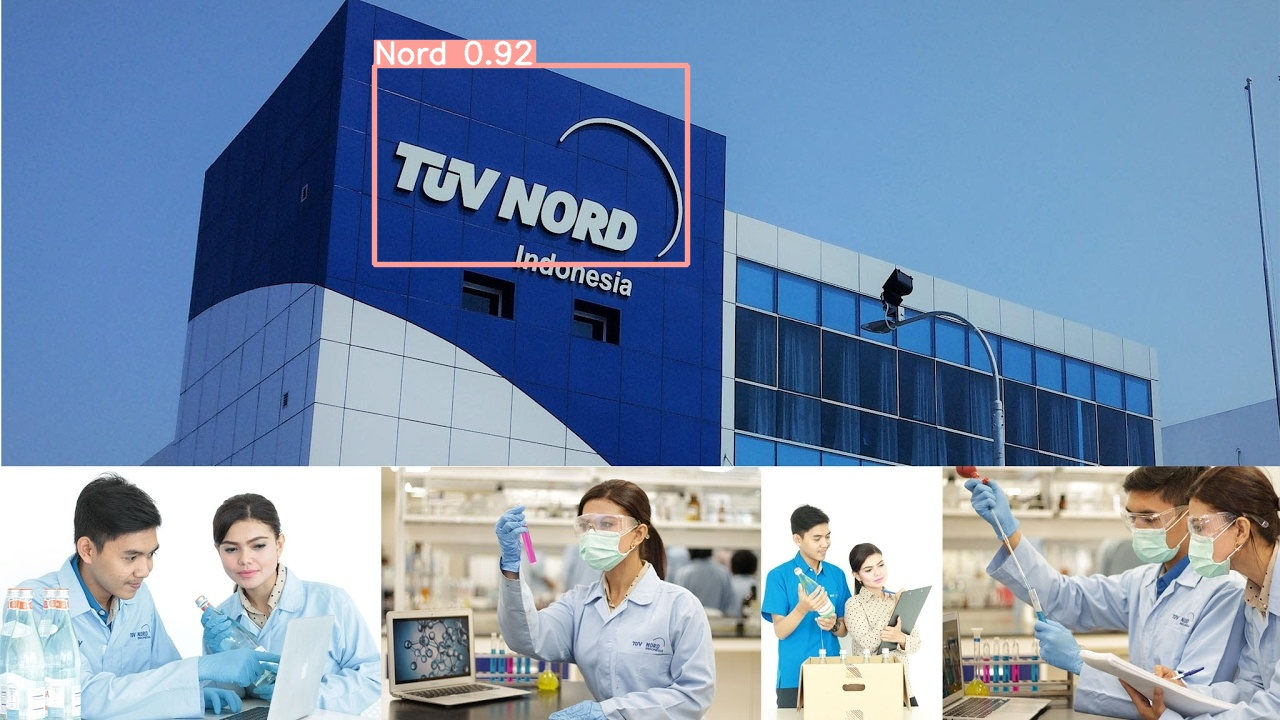

In [14]:
from IPython.display import Image, clear_output 

Image(filename='/content/data/output/run_image/NORD (7).jpeg', width=800)

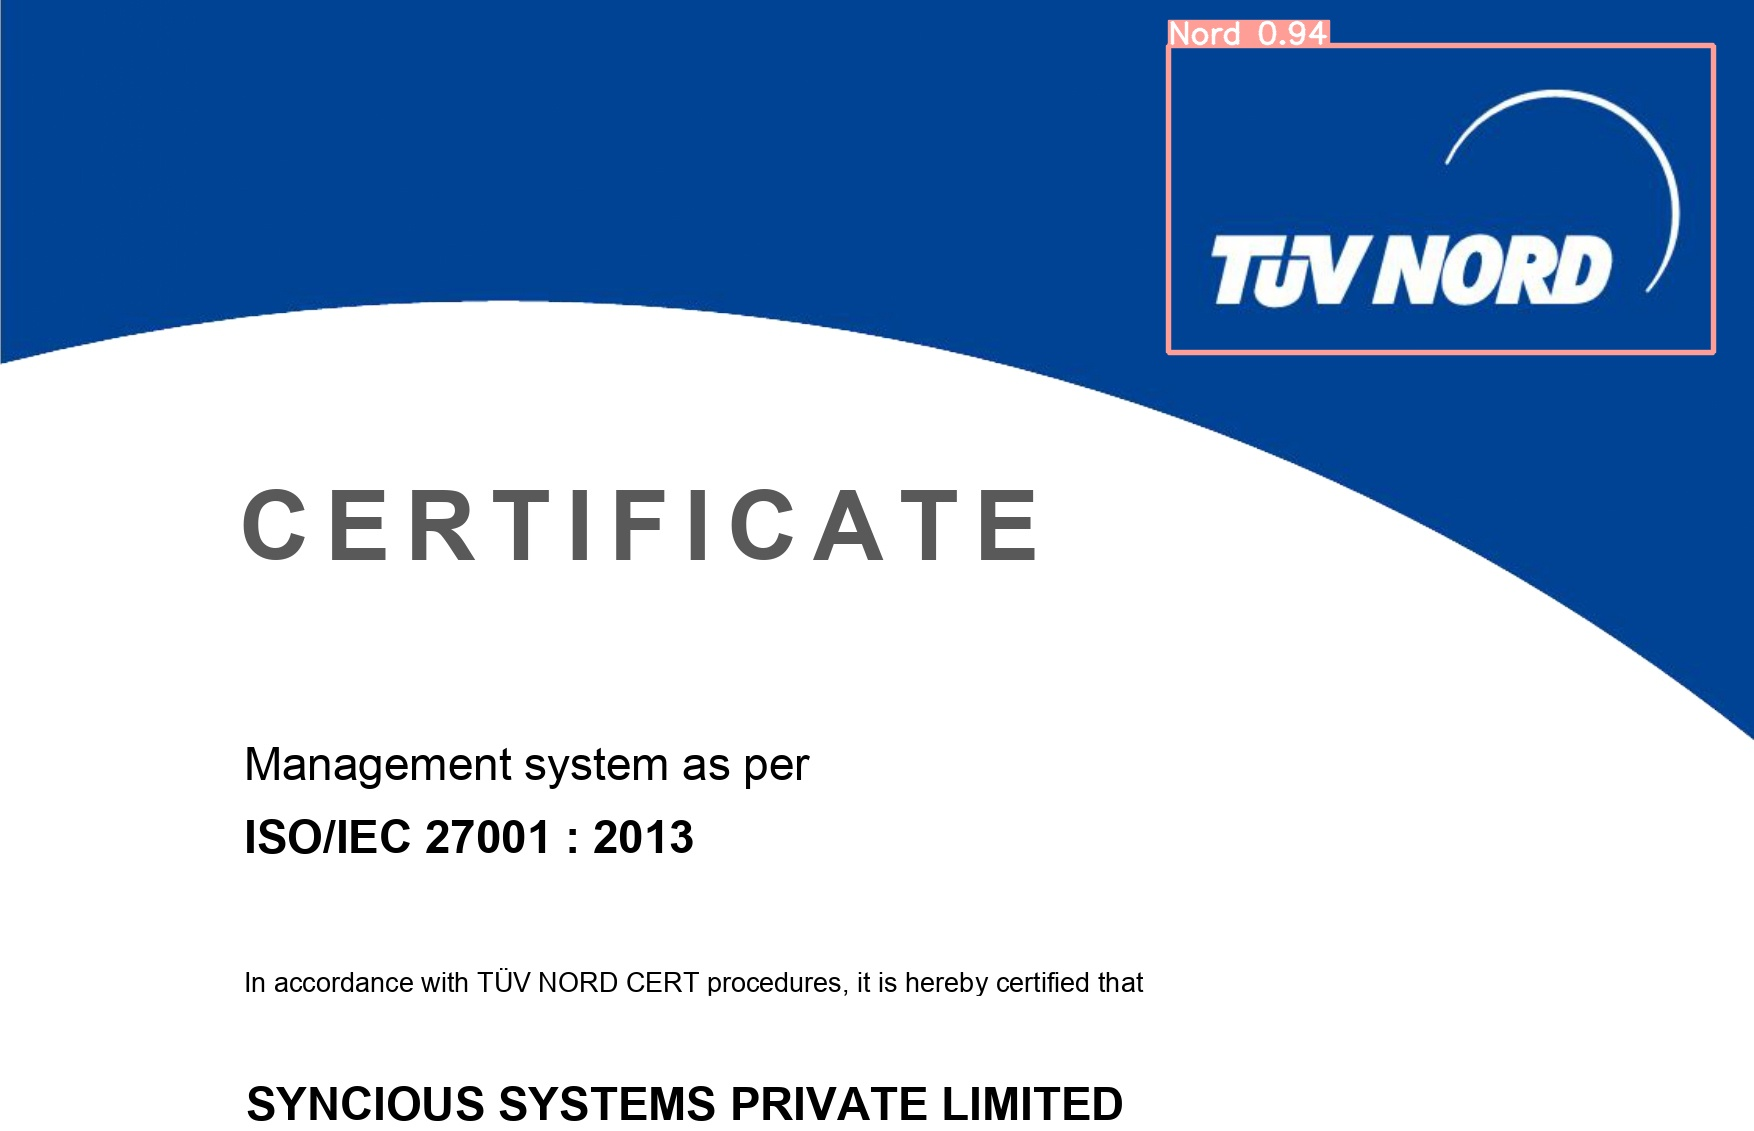

In [15]:
Image(filename='/content/data/output/run_image/NORD (6).jpeg', width=800)

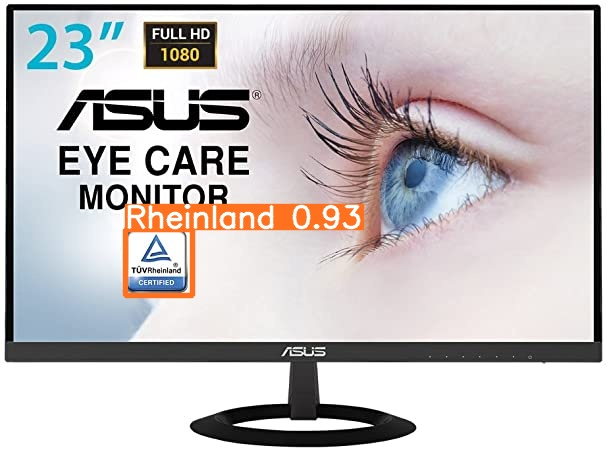

In [16]:
Image(filename='/content/data/output/run_image/Rheinland (9).jpeg', width=800)

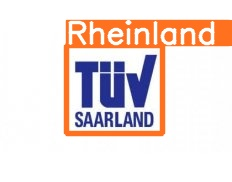

In [21]:
Image(filename='/content/data/output/run_image/SAARLAND (1).jpeg', width=800)

In [ ]:
Image(filename='/content/data/output/run_image/SUD1.jpeg', width=800)

In [ ]:
Image(filename='/content/data/output/run_image/THURINGEN5.jpeg', width=800)

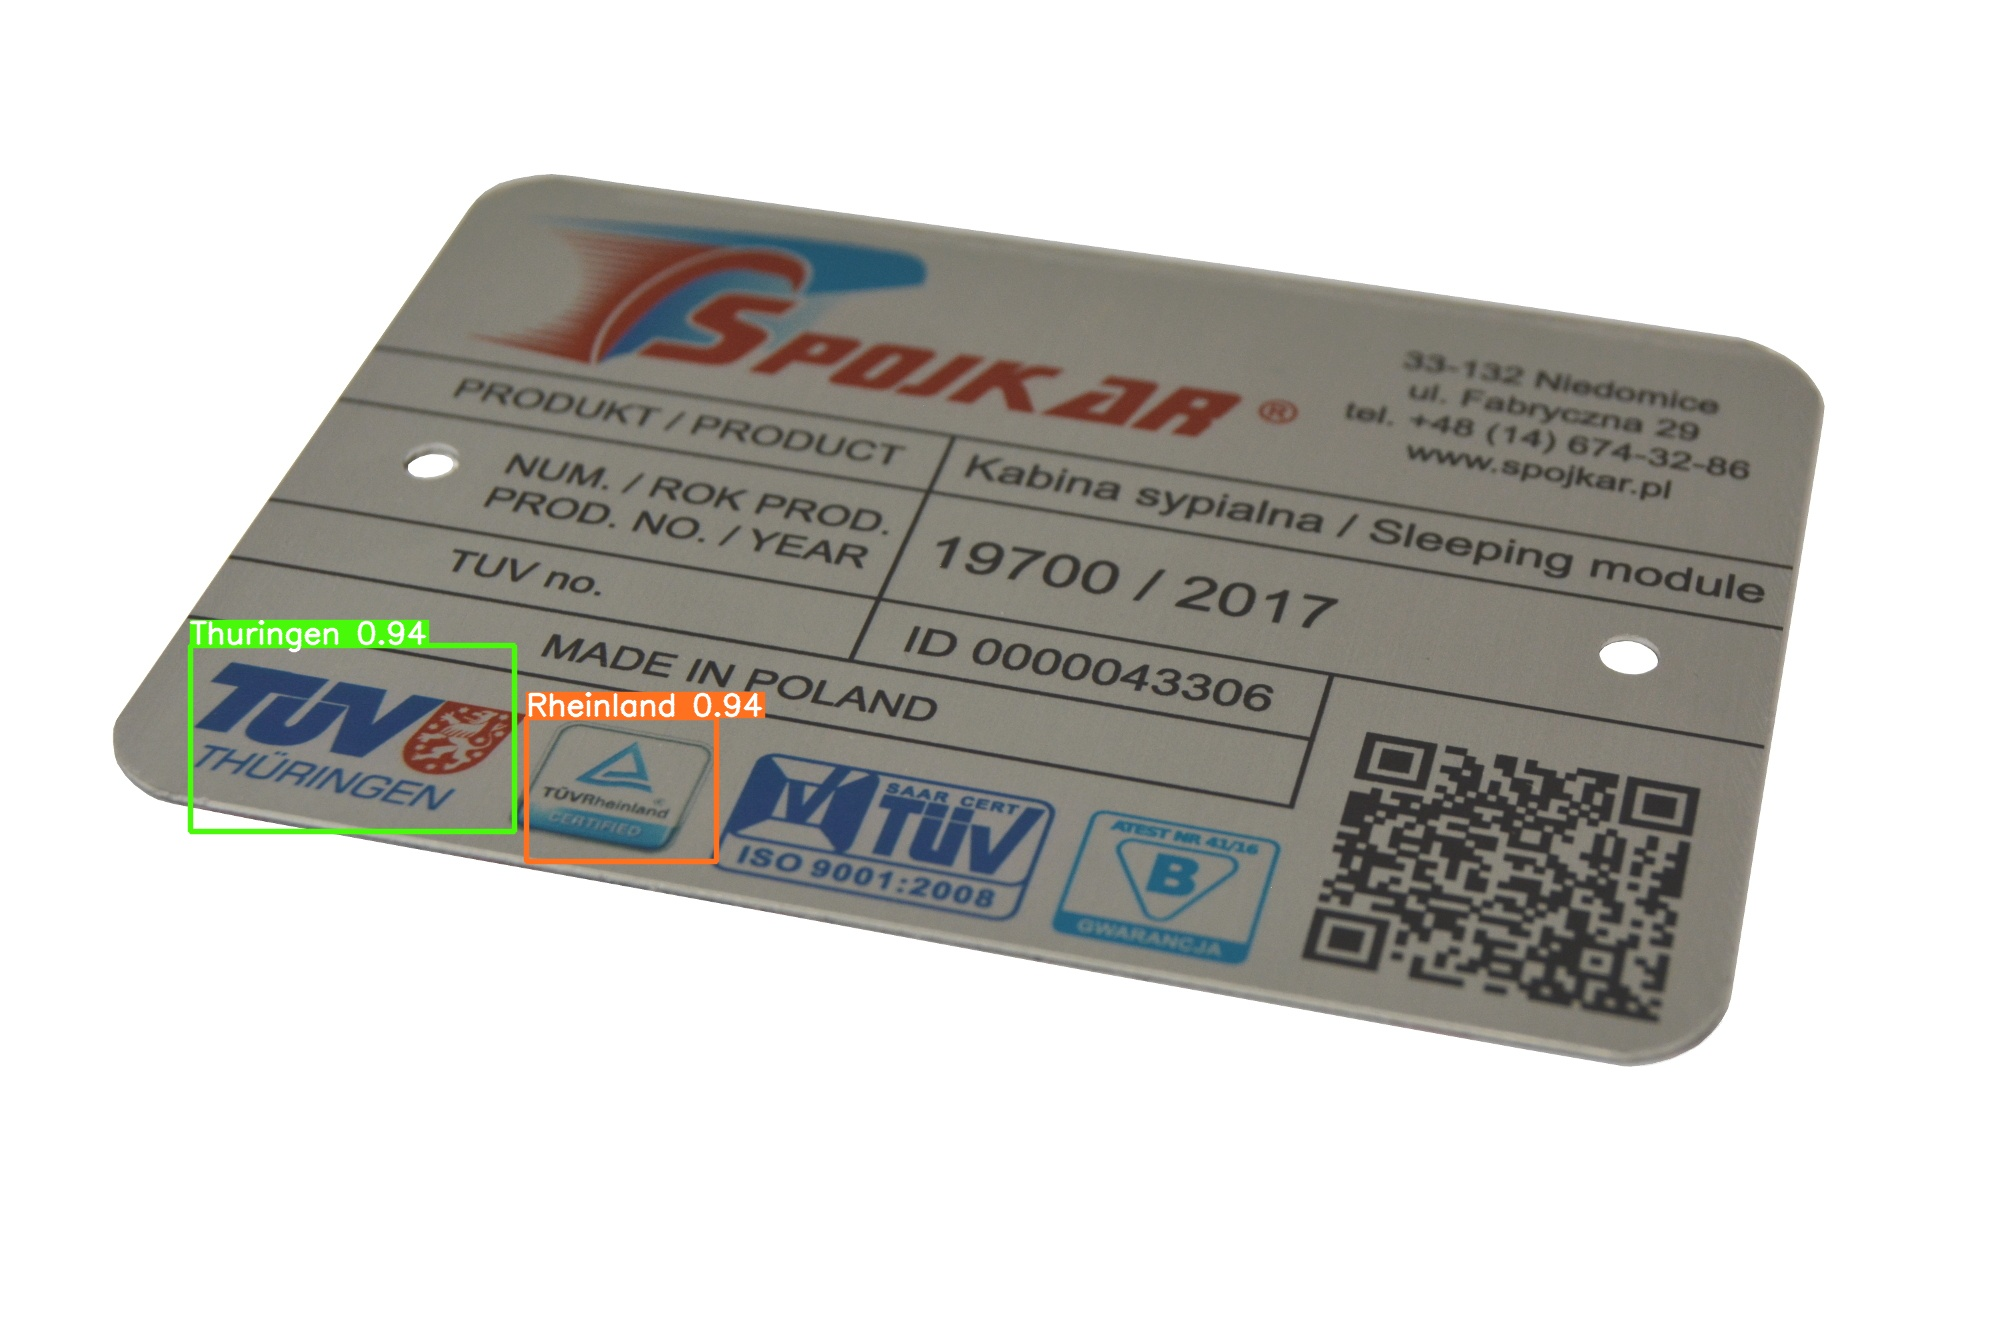

In [25]:
Image(filename='/content/data/output/run_image/THURINGEN (9).jpeg', width=800)